In [1]:
import json
import spacy
import matplotlib.pyplot as plt
import pandas as pd
import difflib

In [2]:
import sys
sys.path.insert(0,'/home/vishesh/TUM/Thesis/huggingface/neuralcoref') 
from neuralcoref import Coref

In [3]:
coref = Coref()

Loading spacy model

    Info about model en_core_web_sm

    lang               en             
    pipeline           ['tagger', 'parser', 'ner']
    accuracy           {'token_acc': 99.8698372794, 'ents_p': 84.9664503965, 'ents_r': 85.6312524451, 'uas': 91.7237657538, 'tags_acc': 97.0403350292, 'ents_f': 85.2975560875, 'las': 89.800872413}
    name               core_web_sm    
    license            CC BY-SA 3.0   
    author             Explosion AI   
    url                https://explosion.ai
    vectors            {'keys': 0, 'width': 0, 'vectors': 0}
    sources            ['OntoNotes 5', 'Common Crawl']
    version            2.0.0          
    spacy_version      >=2.0.0a18     
    parent_package     spacy          
    speed              {'gpu': None, 'nwords': 291344, 'cpu': 5122.3040471407}
    email              contact@explosion.ai
    description        English multi-task CNN trained on OntoNotes, with GloVe vectors trained on Common Crawl. Assigns word vectors, cont

In [4]:
nlp = spacy.load('en')

In [5]:
articles = json.load(open('/home/vishesh/TUM/Thesis/Coreference-Resolution/annotation/en_pos_nerc2_pred_anon.json'))

In [6]:
articles[:1]

[{'article_author': [{'article_author_id': 'AUa00Zt2x7',
    'article_author_name': 'mrKBkxh3Bq'}],
  'article_source': 'cafemom',
  'article_text': 'Hi, how many of you are into organic food? I recently got to know about indoor growing and farming and since then, I am thinking of giving it a try. As we know that most of the food that we eat is grown by using harmful pesticides, I think it is our duty to feed our children from organic food in their early age at least so that their base becomes strong.I am already seeing various symptoms of bad eating habits and pesticide grown food in my city (New-Delhi). People have become less energetic as compared to my previous generation. Any views on this?',
  'article_text_nerc': [['O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O'],
   ['O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
 

In [7]:
len(articles[1]['comments'])

6

In [8]:
articles[1]['comments'][0]['comment_text']

'Why am I not shocked ?? lol'

In [9]:
def get_all_comments(articles):
    '''
    This function extracts all the comments from the articles and makes a list of comments per article

    Args: 
    articles: all the articles in the corpus.

    Return:
    article_comments: a list of lists with all the comments per article.
    '''
    
    article_comments = []
    for article in articles:
        comments_list = []
        if len(article[u'comments']) >= 1:
            for comment in article[u'comments']:
                comment_text = comment[u'comment_text'].replace('\n','')
                comments_list.append(comment_text)
            article_comments.append(comments_list)
        else:
            article_comments.append('no comments')
    return article_comments
    

In [10]:
comments = []
for ar_cmt in get_all_comments(articles):
    for c in ar_cmt:
        comments.append(c)

In [11]:
comments[20]

'Sav- A -Lot.....No Contest!!!'

In [23]:
org = 0
org_mention = 0
p_org_mention = 0
loc_mention = 0
loc = 0
loc_mention = 0
p_loc_mention = 0
person = 0
person_mention = 0
p_person_mention = 0
date = 0
date_mention = 0
p_date_mention = 0
gpe = 0
gpe_mention = 0
p_gpe_mention = 0
time = 0
time_mention = 0
p_time_mention = 0
cardinal = 0
cardinal_mention = 0
p_cardinal_mention = 0
quantity = 0
quantity_mention = 0
p_quantity_mention = 0
money = 0
money_mention = 0
p_money_mention = 0
norp = 0
norp_mention = 0
p_norp_mention = 0
total_mention = 0
other_ent = 0
other_mention = 0
p_other_mention = 0
mentions_in_comment = []
for c in range(0, 10000):
    print(c)
    if len(comments[c]) > 0:
        clusters = coref.one_shot_coref(utterances=comments[c])
        for m in coref.get_mentions():
            mentions_in_comment.append(str(m))
            total_mention += 1
        doc = nlp(comments[c])
        for ent in doc.ents:
            if ent.label_ == 'ORG':
                org += 1
                if str(ent.text) in mentions_in_comment:
                    org_mention += 1
                else:
                    for mention in mentions_in_comment:
                        seq=difflib.SequenceMatcher(None, mention,ent.text)
                        print('here')
                        if seq.ratio() > 0.6:
                            #print('here')
                            p_org_mention += 1
                            break
            elif ent.label_ == 'LOC':
                loc += 1
                if str(ent.text) in mentions_in_comment:
                    loc_mention += 1
                else:
                    for mention in mentions_in_comment:
                        seq=difflib.SequenceMatcher(None, mention,ent.text)
                        if seq.ratio() > 0.6:
                            p_loc_mention += 1
                            break
            elif ent.label_ == 'PERSON':
                person += 1
                if str(ent.text) in mentions_in_comment:
                    person_mention += 1
                else:
                    for mention in mentions_in_comment:
                        seq=difflib.SequenceMatcher(None, mention,ent.text)
                        if seq.ratio() > 0.6:
                            p_person_mention += 1
                            break
            elif ent.label_ == 'DATE':
                date += 1
                if str(ent.text) in mentions_in_comment:
                    date_mention += 1
                else:
                    for mention in mentions_in_comment:
                        seq=difflib.SequenceMatcher(None, mention,ent.text)
                        if seq.ratio() > 0.6:
                            p_date_mention += 1
                            break
            elif ent.label_ == 'GPE':
                gpe += 1
                if str(ent.text) in mentions_in_comment:
                    gpe_mention += 1
                else:
                    for mention in mentions_in_comment:
                        seq=difflib.SequenceMatcher(None, mention,ent.text)
                        if seq.ratio() > 0.6:
                            p_gpe_mention += 1
                            break
            elif ent.label_ == 'TIME':
                date += 1
                if str(ent.text) in mentions_in_comment:
                    date_mention += 1
                else:
                    for mention in mentions_in_comment:
                        seq=difflib.SequenceMatcher(None, mention,ent.text)
                        if seq.ratio() > 0.6:
                            p_time_mention += 1
                            break
            elif ent.label_ == 'CARDINAL':
                cardinal += 1
                if str(ent.text) in mentions_in_comment:
                    cardinal_mention += 1
                else:
                    for mention in mentions_in_comment:
                        seq=difflib.SequenceMatcher(None, mention,ent.text)
                        if seq.ratio() > 0.6:
                            p_cardinal_mention += 1
                            break
            elif ent.label_ == 'QUANTITY':
                quantity += 1
                if str(ent.text) in mentions_in_comment:
                    quantity_mention += 1
                else:
                    for mention in mentions_in_comment:
                        seq=difflib.SequenceMatcher(None, mention,ent.text)
                        if seq.ratio() > 0.6:
                            p_quantity_mention += 1
                            break
            elif ent.label_ == 'MONEY':
                money += 1
                if str(ent.text) in mentions_in_comment:
                    money_mention += 1
                else:
                    for mention in mentions_in_comment:
                        seq=difflib.SequenceMatcher(None, mention,ent.text)
                        if seq.ratio() > 0.6:
                            p_money_mention += 1
                            break
            elif ent.label_ == 'NORP':
                norp += 1
                if str(ent.text) in mentions_in_comment:
                    norp_mention += 1
                else:
                    for mention in mentions_in_comment:
                        seq=difflib.SequenceMatcher(None, mention,ent.text)
                        if seq.ratio() > 0.6:
                            p_norp_mention += 1
                            break
            else:
                other_ent += 1
                if str(ent.text) in mentions_in_comment:
                    other_mention += 1
                else:
                    for mention in mentions_in_comment:
                        seq=difflib.SequenceMatcher(None, mention,ent.text)
                        if seq.ratio() > 0.6:
                            p_other_mention += 1
                            break
    mentions_in_comment = []

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88


KeyboardInterrupt: 

In [24]:
print('PERSON Entities: {} Mentions: {} Partial mentions: {}'.format(person, person_mention, p_person_mention))
print('ORG Entities: {} Mentions: {} Partial mentions: {}'.format(org, org_mention, p_org_mention))
print('LOC Entities: {} Mentions: {} Partial mentions: {}'.format(loc, loc_mention, p_loc_mention))
print('DATE Entities: {} Mentions: {} Partial mention: {}'.format(date, date_mention, p_date_mention))
print('GPE Entities: {} Mentions: {} Partial mention: {}'.format(gpe, gpe_mention, p_gpe_mention))
print('TIME Entities: {} Mentions: {} Partial mention: {}'.format(time, time_mention, p_time_mention))
print('CARDINAL Entities: {} Mentions: {} Partial mention: {}'.format(cardinal, cardinal_mention, p_cardinal_mention))
print('QUANTITY Entities: {} Mentions: {} Partial mention: {}'.format(quantity, quantity_mention, p_quantity_mention))
print('MONEY Entities: {} Mentions: {} Partial mention: {}'.format(money, money_mention, p_money_mention))
print('NORP Entities: {} Mentions: {} Partial mention: {}'.format(norp, norp_mention, p_norp_mention))
print('Other Entities: {} Mentions: {} Partial mention: {}'.format(other_ent, other_mention, p_other_mention))

PERSON Entities: 30 Mentions: 30 Partial mentions: 0
ORG Entities: 70 Mentions: 70 Partial mentions: 0
LOC Entities: 2 Mentions: 2 Partial mentions: 0
DATE Entities: 39 Mentions: 27 Partial mention: 5
GPE Entities: 22 Mentions: 22 Partial mention: 0
TIME Entities: 0 Mentions: 0 Partial mention: 1
CARDINAL Entities: 34 Mentions: 2 Partial mention: 4
QUANTITY Entities: 6 Mentions: 2 Partial mention: 2
MONEY Entities: 10 Mentions: 0 Partial mention: 2
NORP Entities: 6 Mentions: 6 Partial mention: 0
Other Entities: 12 Mentions: 7 Partial mention: 0


In [185]:
entity_mention_analysis = pd.read_csv('entity_mention_analysis.csv', index_col=0)

In [186]:
x = [entity_mention_analysis['EntityCount'], entity_mention_analysis['MentionCount']]

In [187]:
entity_mention_analysis

,EntityCount,MentionCount
EntityType,,
Person,1281,1281
Org,4910,4910
Loc,240,240
Date,1799,1027
Gpe,1814,1814
Time,0,0
Cardinality,1803,507
Quantity,206,68
Money,246,18


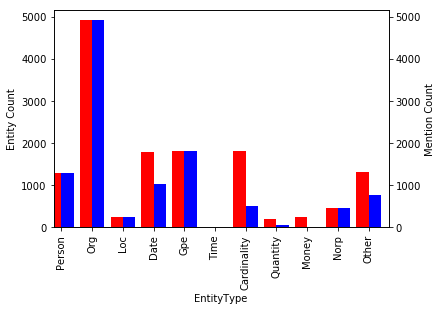

In [188]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

entity_mention_analysis.EntityCount.plot(kind='bar', color='red', ax=ax, width=width, position=1)
entity_mention_analysis.MentionCount.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Entity Count')
ax2.set_ylabel('Mention Count')

plt.show()